In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')  # due to warnings during plotting
  

In [3]:
# Load Data
iris = datasets.load_iris()
x = iris.data
y = iris.target

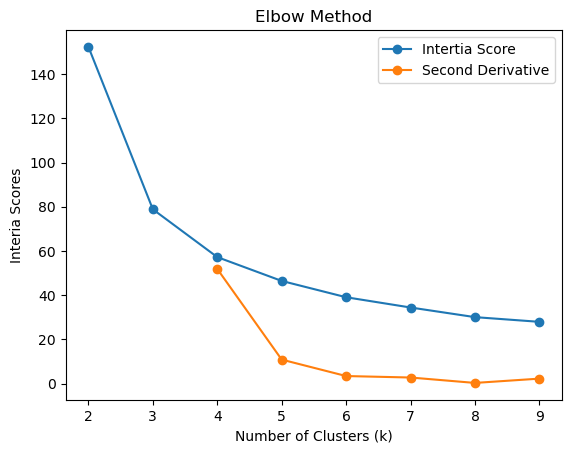

In [4]:
def elbow_method():
    k_values = []
    intertia_scores = []
    # finding K
    for k in range(2, 10):
        model = KMeans(n_clusters=k)
        model.fit(x)
        intertia_scores.append(model.inertia_)
        k_values.append(k)
    module_of_second_derivative = np.abs(np.diff(np.diff(intertia_scores)))

    # plot the intertia scores and second derivative
    fig, ax = plt.subplots()
    ax.plot(k_values, intertia_scores, marker="o", label="Intertia Score")
    ax.plot(k_values[2:], module_of_second_derivative, marker="o", label="Second Derivative")
    ax.set_xlabel("Number of Clusters (k)")
    ax.set_ylabel("Interia Scores")
    ax.set_title("Elbow Method")
    ax.legend()
    return plt.show()
elbow_method()

### K = 3 looks good as intertia from these points getting decreases slowly, We are using K=3


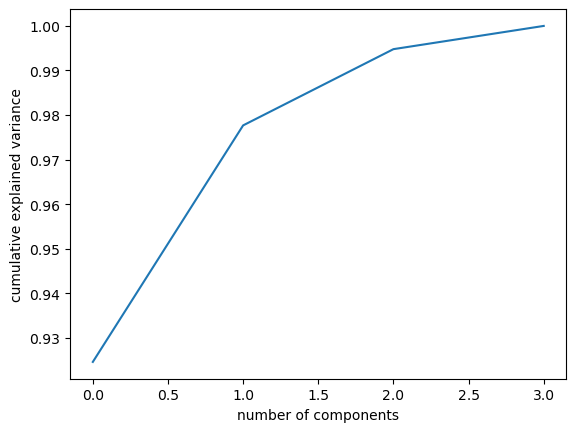

In [5]:
# Finding Number of Components
def cumsum():
    pca = PCA().fit(x)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("number of components")
    plt.ylabel("cumulative explained variance")
    return plt.show()
cumsum()

### We can see that more than 99% of the variance is contained in the first 2 components.


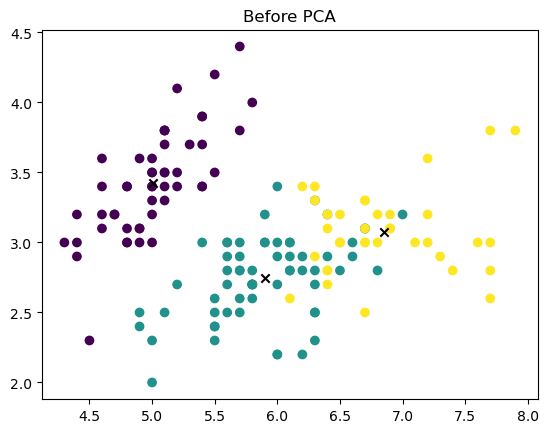

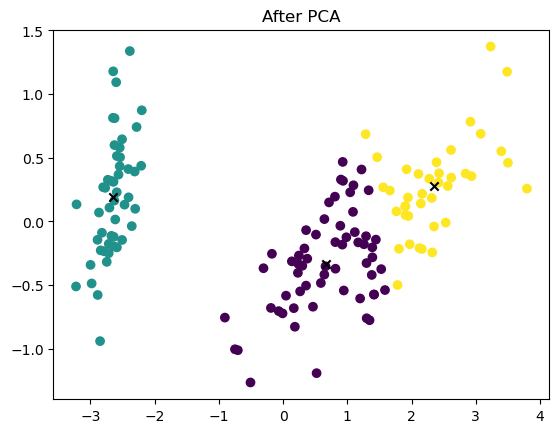

In [6]:
def generate_plot(all_predictions, centroids, title="Before PCA"):
    plt.scatter(x[:, 0], x[:, 1], c=all_predictions)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="black")
    plt.title(title)
    return plt.show()

def kmeans_clustering(x):
    model = KMeans(n_clusters=3, n_init=1, max_iter=100)
    model.fit(x)
    all_predictions = model.predict(x)
    centroids = model.cluster_centers_
    return all_predictions, centroids

def kmeans_clustering_after_pca(x):
    # apply PCA to reduce the data to 2 dimensions
    pca = PCA(n_components=2)
    x_reduced = pca.fit_transform(x)
    all_predictions, centroids = kmeans_clustering(x_reduced)
    return all_predictions, centroids, x_reduced


# plot the data before applying PCA
all_predictions_without_pca, centroids_without_pca = kmeans_clustering(x)
generate_plot(all_predictions_without_pca, centroids_without_pca)

# plot the data after applying PCA
all_predictions_with_pca, centroids_with_pca, x = kmeans_clustering_after_pca(x)
generate_plot(all_predictions_with_pca, centroids_with_pca, title="After PCA")

## Before PCA Observations
    1. The Data is spreaded (Not clear clusters)
    2. One of the 4 cluster is quite clear, but not other 3
    
##  After PCA Observations
    1. The Data is clusterd in good form
    2. all centroid mostly cover their points
    3. More clear Cluster after applying PCA
